# DATA 602 Week 2 HW - Kratika Aggarwal (September 25, 2022)

## Hypothesis Testing 

1. Null Hypothesis (H0): The sample mean is extracted from population mean i.e. both are the same.
2. Alternate Hypothesis (H1): The sample mean mean and population mean are different.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
mu, sigma = 3, 2
s = np.random.normal(mu, sigma, 10000)
#mu, std = norm.fit(s)

In [3]:
s

array([6.45815195, 3.47545318, 0.99291073, ..., 2.21961076, 3.33230287,
       0.11640679])

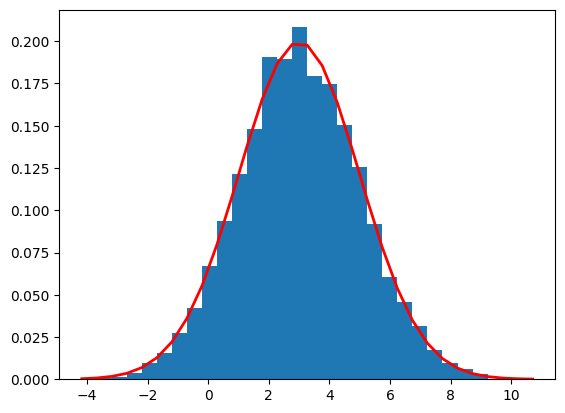

In [4]:
mu, sigma = 3, 2 
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
m=1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) )
plt.plot(bins, m,linewidth=2, color='r')
plt.show()

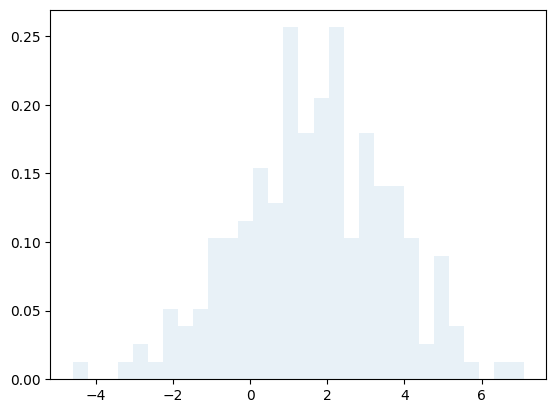

In [5]:
sample_mean, sample_sigma = 1.5, 2
sample = np.random.normal(sample_mean, sample_sigma, 200)
count, bins, ignored = plt.hist(sample, 30, alpha=0.1, density=True)

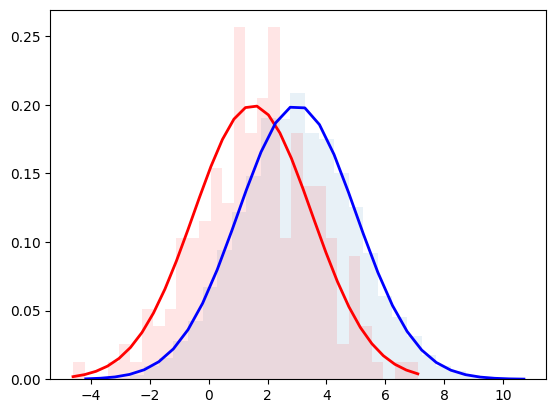

In [6]:
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)
plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.plot(bins,m,linewidth=2, color='b')
plt.show()

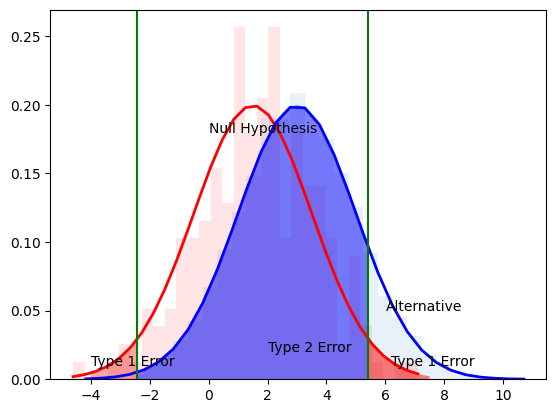

In [7]:
ci = scipy.stats.norm.interval(0.95, loc=1.5, scale=2)
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)
plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')
plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')
plt.fill_between(x=np.arange(-4,ci[0],0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(-4,ci[0],0.01),loc=1.5,scale=2) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(ci[1],7.5,0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[1],7.5,0.01),loc=1.5,scale=2) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(ci[0],ci[1],0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[0],ci[1],0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.5)

plt.text(x=0, y=0.18, s= "Null Hypothesis")
plt.text(x=6, y=0.05, s= "Alternative")
plt.text(x=-4, y=0.01, s= "Type 1 Error")
plt.text(x=6.2, y=0.01, s= "Type 1 Error")
plt.text(x=2, y=0.02, s= "Type 2 Error")
plt.show()


In [8]:
zscore=(sample_mean-mu)/sigma
zscore

-0.75

In [9]:
p_value = scipy.stats.norm.sf(abs(zscore)) 
p_value

0.2266273523768682

As our p value > alpha(0.05), hence we are accenpting Null Hypothesis. We can say with 95% confidence that our sample has been extracted from population.

Further, we can see that our population mean and sample mean are different, hence this is a false positive case. 

Reference : https://medium.com/analytics-vidhya/hypothesis-tests-with-python-bfff05955c43